## Accelerating Insurance Claim Process with Machine Learning

### Random Forests, Support Vector Machines, MLP Neural Networks and K- Nearest Neighbour Learning

Kaggle competition: BNP Paribas cardif claims management problem

Created by John Ryan 22th April 2017

Data source: https://www.kaggle.com/c/bnp-paribas-cardif-claims-management

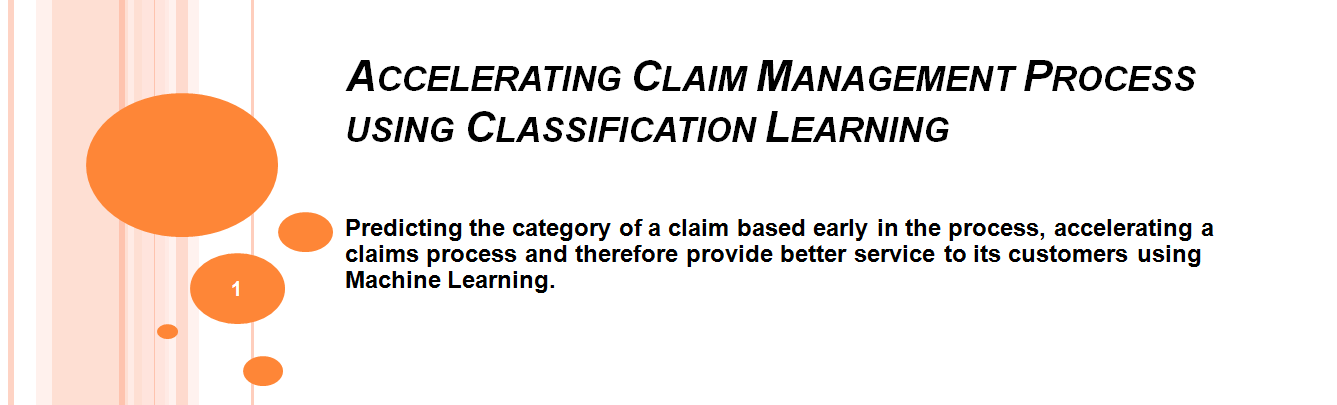

In [1]:
from IPython.display import Image
Image("C:\\data\\image.png",  width=900, height=600)

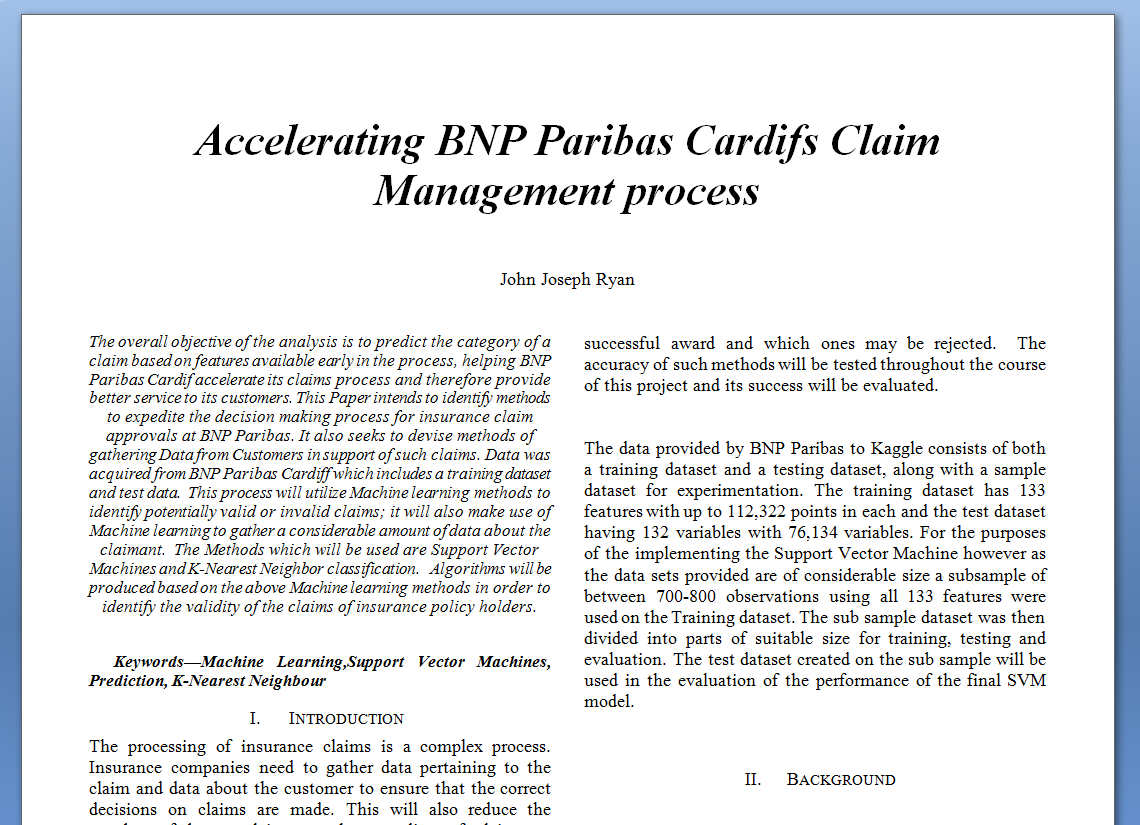

In [2]:
Image("C:\\data\\bnp.png",  width=900, height=600)

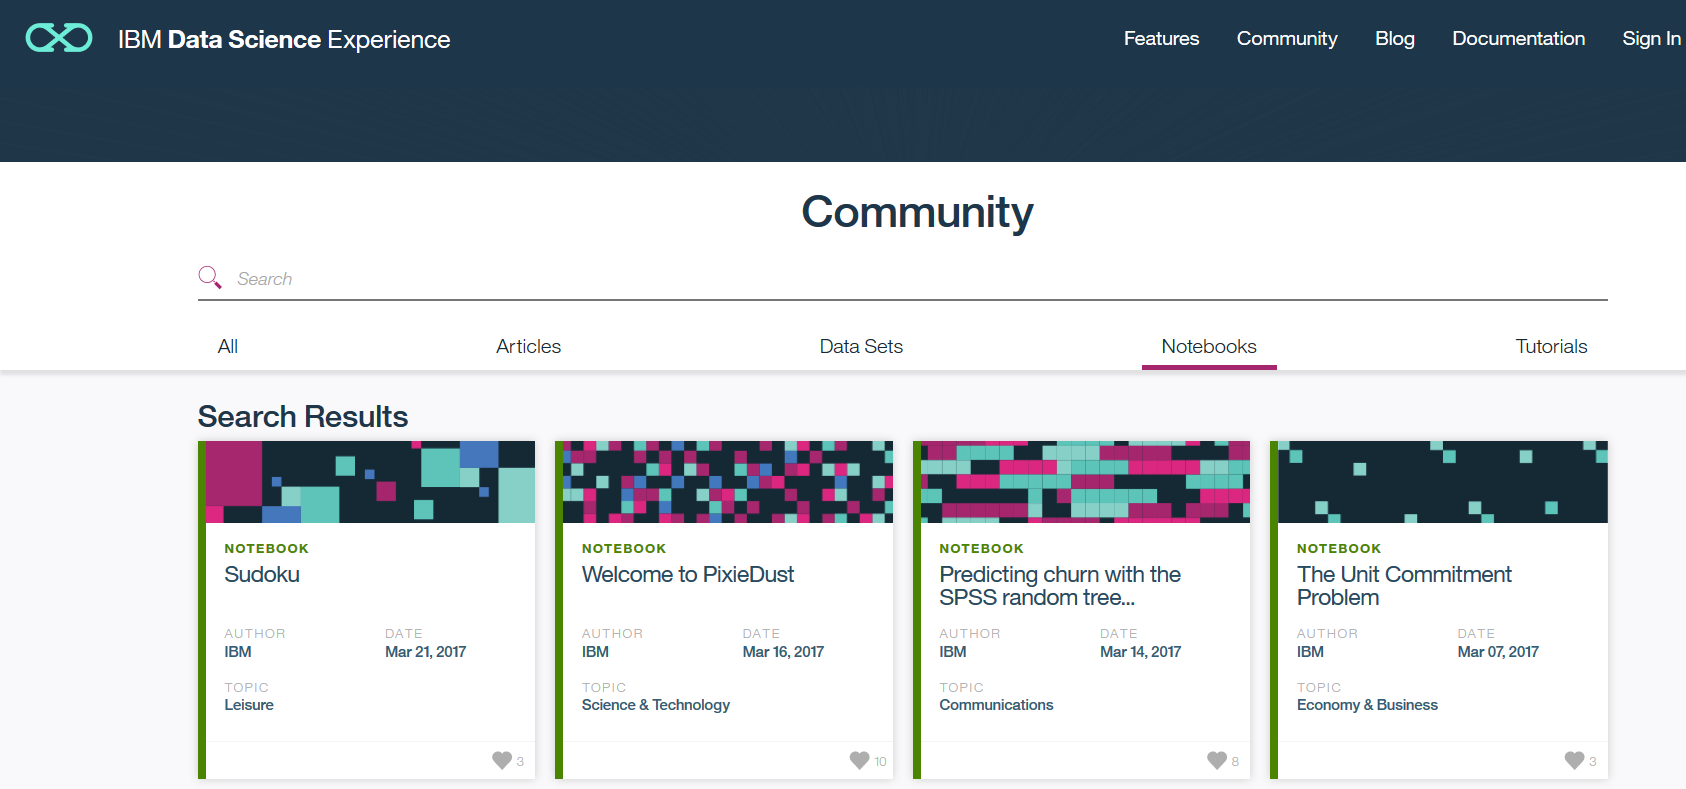

In [3]:
from IPython.display import Image
Image("C:\\data\\Image2.png",  width=900, height=600)

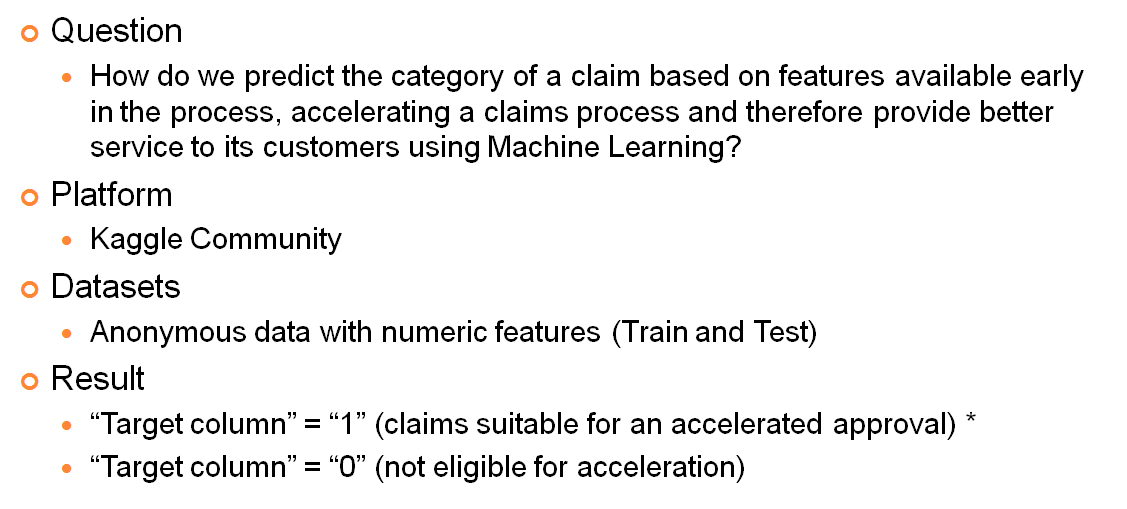

In [4]:
Image("C:\\data\\image1.png",  width=500, height=200)

In [2]:
#import dependencies
import os
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore", category=DeprecationWarning,
                       module="pandas, lineno=570")
from __future__ import print_function
import os
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from sklearn import preprocessing
from sklearn.metrics import log_loss, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

##   1.0 - Data Cleaning & Preperation

1. Read in the csv file.
2. Describe and analysis the data
3. Randomization of the data, separate out all variables to make sure they have the correct     data type i.e. numeric, nominal and categorical.
3. Missing value treatment.
4. Encode labels in the data set with "one hot encoder".
5. Use cross Validation to create a test, training and validation data set.
6. Remove columns from the training data set and select important features.
7. Randomization of the data, separate out all variables to make sure they have the correct data type i.e. numeric, nominal and categorical.
8. Build machine Learning algorithms using pythons sci-kit learn from on the training, test data set constructed and preprocessed.
9. Evaluate the results.
10.Improve Performance.


In [3]:
#Load the data and make dataset a Pandas DataFrame
df = pd.read_csv("C:\\data\\claims.csv")
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
#summerize the data to make some initle assessments
df.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,...,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,...,1.356294e+00,1.795978e+00,2.604704,2.099407e+00,5.031683e-01,1.625988e+00,1.074232e+00,0.693262,1.264497e+00,1.134702e+00
min,3.000000,0.000000,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.820642e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,57280.000000,1.000000,9.135798e-01,5.316428e+00,3.487398e+00,7.605918e+00,2.065064e+00,2.101477e+00,8.658986e-02,7.853659e+00,...,1.786965e+00,5.647712e+00,1.963315,2.053777e-02,1.417600e+00,2.101900e+00,1.393830e+00,0.000000,1.106172e+00,1.012658e+00
50%,114189.000000,1.000000,1.469550e+00,7.023803e+00,4.205991e+00,8.670867e+00,2.412790e+00,2.452166e+00,3.860317e-01,9.059582e+00,...,2.436195e+00,6.749117e+00,2.739239,1.398639e-01,1.614802e+00,2.963620e+00,1.798436e+00,0.000000,1.560138e+00,1.589403e+00
75%,171206.000000,1.000000,2.136128e+00,9.465497e+00,4.833250e+00,9.771353e+00,2.775285e+00,2.834285e+00,1.625246e+00,1.023256e+01,...,3.379175e+00,7.911392e+00,4.075361,8.718333e-01,1.843886e+00,4.108146e+00,2.390158e+00,0.000000,2.332425e+00,2.261905e+00
max,228713.000000,1.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


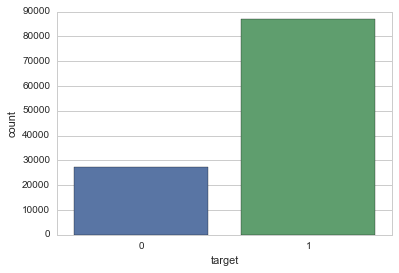

In [5]:
#A glimpse at the target variable using a bar plot
sns.countplot(x="target", data=df)

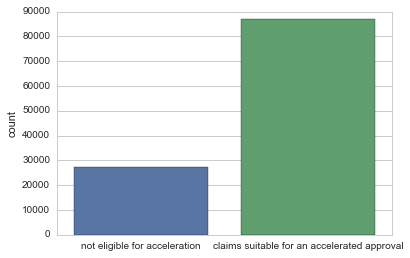

In [6]:
#View of target varable by labels 0 = not eligible for acceleration,  
#1 = claims suitable for an accelerated approval
d = sns.countplot(x ="target", data=df)
d.set(xticklabels=['not eligible for acceleration', 'claims suitable for an accelerated approval'])
plt.xlabel(' ')
d;

### 1.1 - Missing Value Treatment

For this example we will use the PVI technique meaning Predictive Value Imputation. Before the model is created we will use this method when detecting missing values to estimate values that to replace NaN's with the attribute’s mean, median or mode value.

steps taken:

- Print out the number of missing values in the entire data set
- Fill in missing value using mean value of the attributes
- Summerize the data after cleaning or transforming activities

In [8]:
#Print out the number of missing values
print("Number of NA values : {0}".format((df.shape[0] * df.shape[1]) - df.count().sum()))

Number of NA values : 4967293


In [9]:
#Missing Value PVI using mean value of attributes;
x = df.fillna(df.mean())
x.head(7)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,22,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,1.630686,7.464411,3,4.145098,9.191265,2.436402,2.483921,2.301630,...,6.822439,3.549938,0.598896,7,1.672658,3.239542,1.957825,0,1.925763,1.739389
2,5,1,0.943877,5.310079,3,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,6,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,3,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,65,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,1.630686,7.464411,3,4.145098,8.742359,2.436402,2.483921,1.496569,...,6.822439,3.549938,0.919812,90,1.672658,3.239542,2.030373,0,1.925763,1.739389
5,9,0,1.630686,7.464411,3,4.145098,8.856791,2.436402,2.483921,0.359993,...,6.822439,3.549938,0.049861,88,1.672658,3.239542,1.536222,0,1.925763,1.739389
6,12,0,0.899806,7.312995,3,3.494148,9.946200,1.926070,1.770427,0.066251,...,3.476299,1.992594,0.083758,38,3.276100,1.623298,2.266575,0,2.263736,0.970873


In [11]:
print("Number of NA values : {0}".format((x.shape[0] * x.shape[1]) - x.count().sum()))

Number of NA values : 0


In [12]:
#Always good preactise to summerize the data after cleaning or transforming activities
x.describe()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,1.143210e+05,1.143210e+05,114321.000000,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,...,1.143210e+05,114321.000000,1.143210e+05,114321.000000,1.143210e+05,1.143210e+05,1.143210e+05,114321.000000,1.143210e+05,1.143210e+05
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,2.904847,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,...,6.822439e+00,3.549938,9.198120e-01,46.719964,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,8.132649e-01,2.225036e+00,0.521065,8.626621e-01,1.543441e+00,4.506138e-01,4.427150e-01,2.109786e+00,...,1.348700e+00,1.943431,1.591555e+00,25.405608,3.779128e-01,1.221225e+00,8.143413e-01,0.693262,9.496402e-01,8.518204e-01
min,3.000000,0.000000,-9.996497e-07,-9.817614e-07,0.000000,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,...,-9.978497e-07,0.019139,-9.994953e-07,0.000000,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,57280.000000,1.000000,1.346153e+00,6.575770e+00,3.000000,4.068697e+00,8.394090e+00,2.340968e+00,2.376586e+00,2.653147e-01,...,6.519607e+00,2.571053,8.471320e-02,26.000000,1.570974e+00,2.762497e+00,1.681261e+00,0.000000,1.449477e+00,1.463414e+00
50%,114189.000000,1.000000,1.630686e+00,7.464411e+00,3.000000,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,...,6.822439e+00,3.549938,9.198120e-01,46.000000,1.672658e+00,3.239542e+00,2.030373e+00,0.000000,1.925763e+00,1.739389e+00
75%,171206.000000,1.000000,1.630686e+00,7.551501e+00,3.000000,4.340229e+00,8.924798e+00,2.484699e+00,2.528445e+00,1.496569e+00,...,6.999999e+00,3.549938,9.198120e-01,69.000000,1.672658e+00,3.239542e+00,2.030373e+00,0.000000,1.925763e+00,1.739389e+00
max,228713.000000,1.000000,2.000000e+01,2.000000e+01,3.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,19.686069,2.000000e+01,90.000000,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


## 1.2 - Feature Importance
### Estimating highly predictive features with a Ensemble Random Tree Classifier

Sometimes when we are faced with a large dataset with a large amount of features it may be useful to carry out an automatic variable selection on the columns. We can make use of machine learning to make an estimate on what are the most relevant feature for a predictive model scenario. To determine a list of predictive features a meta estimator can be used that fits a number of decision trees on sub-samples of the main dataset.

The n_estimators specifies the number of randomized trees to be used. It is also important to note that the max_features parameter can also be specified to look for the best split in the data. The log2 & square root of the number of features can be used, however for this example we have used the default "auto" which uses the square root of the number of features.

Steps taken:

- Encode Labels "One Hot Encoder"
- Assign the target variable to Y for later processing and Remove the ID Column as not required. 
- Build ExtraTreesClassifier model to extract the best predictive features.
- Rank the Important Variables in order
- Subsetting the resulting data into a data frame with the top ranked features produced by the algorithim

### 1.2.1 - Encode Labels "One Hot Encoder"

First we need to encode any categoral attributes to numeric representations.

In [13]:
#Label encoder tranforms any label or attribute for input to the algorithim 
#we can also see some missing values in the top few rows of the data set these will also
#need to be treated in a suitable mannor.
for feature in x.columns:
    if x[feature].dtype=='object':
        le = LabelEncoder()
        df[feature] = le.fit_transform(x[feature])
x.tail(3)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
114318,228711,1,1.630686,7.464411,3,4.145098,10.069277,2.436402,2.483921,0.323324,...,6.822439,3.549938,0.156764,81,1.672658,3.239542,2.417606,2,1.925763,1.739389
114319,228712,1,1.630686,7.464411,3,4.145098,10.106144,2.436402,2.483921,0.309226,...,6.822439,3.549938,0.490658,51,1.672658,3.239542,3.526650,0,1.925763,1.739389
114320,228713,1,1.619763,7.932978,3,4.640085,8.473141,2.351470,2.826766,3.479754,...,7.936508,2.944285,3.135205,86,1.943149,4.385553,1.604493,0,1.787610,1.386138


In [14]:
#Assign the target variable to Y for later processing and 
#Remove the ID Column that is not needed 
y = x.target.values
x = x.drop(['ID'], axis = 1)

In [15]:
#Feature Importance - selecting only highly prdictive features using random forest Model
from sklearn.ensemble import ExtraTreesClassifier
x.shape
# feature extraction
model = ExtraTreesClassifier(n_estimators = 250, max_features = "auto", random_state=0)
model.fit(x, y)
print(model.feature_importances_)

[  8.59747486e-01   6.49149406e-04   6.48240229e-04   2.35306696e-04
   6.44989081e-04   6.54041387e-04   6.85861167e-04   6.45662100e-04
   5.82026343e-04   6.33884435e-04   3.78767425e-03   5.99661664e-04
   2.38747724e-03   6.02269023e-04   2.69156300e-03   6.22218504e-04
   6.72080243e-04   6.14551541e-04   6.48057213e-04   5.98859933e-04
   6.20538100e-04   2.06448005e-03   1.58215363e-03   7.21670390e-04
   1.86642660e-03   5.87842171e-04   6.35629110e-04   6.40484732e-04
   6.82761877e-04   5.66945889e-04   1.40852440e-03   4.22241328e-03
   5.95350433e-04   6.20893277e-04   2.59562992e-03   6.28390446e-04
   6.47273307e-04   6.51065347e-04   4.49284005e-04   6.42504466e-04
   2.32761475e-03   5.90911164e-04   6.08185456e-04   6.07408830e-04
   6.28350982e-04   6.33693113e-04   5.82212537e-04   5.74973320e-03
   6.13149400e-04   5.82923395e-04   8.94366957e-03   6.58771934e-04
   1.64379057e-03   6.05700059e-04   6.00073854e-04   6.44485140e-04
   2.62486875e-03   6.87948704e-04

### 1.2.2 - Ranking Important Variables

In [16]:
#Ranking the most imporatnt predictive variables potentially build model based on top ranked i.e 1 -16
featureimportance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(featureimportance)[::-1]
#Print top ranked predictive featurescdata = pd.DataFrame(x, columns = [ 'target','v50','v66','v47','v110','v31','v10','v113','v114'..])
print("Feature ranking:")

for feature in range(x.shape[1]):
    print("%d. feature %d (%f)" % (feature + 1, indices[feature], featureimportance[indices[feature]]))   

Feature ranking:
1. feature 0 (0.859747)
2. feature 50 (0.008944)
3. feature 66 (0.006142)
4. feature 47 (0.005750)
5. feature 110 (0.004364)
6. feature 31 (0.004222)
7. feature 10 (0.003788)
8. feature 113 (0.003395)
9. feature 114 (0.002932)
10. feature 14 (0.002692)
11. feature 56 (0.002625)
12. feature 34 (0.002596)
13. feature 62 (0.002491)
14. feature 12 (0.002387)
15. feature 40 (0.002328)
16. feature 21 (0.002064)
17. feature 79 (0.002025)
18. feature 24 (0.001866)
19. feature 129 (0.001703)
20. feature 52 (0.001644)
21. feature 22 (0.001582)
22. feature 125 (0.001551)
23. feature 112 (0.001464)
24. feature 91 (0.001418)
25. feature 107 (0.001415)
26. feature 30 (0.001409)
27. feature 72 (0.001366)
28. feature 71 (0.000927)
29. feature 75 (0.000819)
30. feature 119 (0.000811)
31. feature 23 (0.000722)
32. feature 58 (0.000712)
33. feature 123 (0.000701)
34. feature 57 (0.000688)
35. feature 6 (0.000686)
36. feature 85 (0.000685)
37. feature 28 (0.000683)
38. feature 100 (0.0006

In [37]:
#Subsetting the data set using the top ranked variable produced by the algorithim
cdata = pd.DataFrame(x, columns = [ 'target','v50','v66','v47','v110','v31','v10','v114'])
cdata.tail(4)

,target,v50,v66,v47,v110,v31,v10,v114
114317,1,3.269020,0,2,1,2,6.236324,11.248736
114318,1,2.410681,0,2,1,2,2.078775,8.893134
114319,1,0.821657,0,2,1,1,1.291029,12.381113
114320,1,1.000661,2,2,1,1,0.853391,14.635298


In [27]:
#entire dataset - removed the target variable
#X = x.drop(['target'], axis = 1)
#Y = x.target.values

### 2.0 - Building Machine Learning Models

### 2.1 - Random Forest Algorithm

There are many advantages to applying a tree model with bootstrap aggregation and building each tree from different random subset of features which encourages ensemble diversity and thus reduces training time significantly.

Scaling or transforming the data is not necessary for random forests.
This algorithim deals with convergence and numerical precision issues,
which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important. Because of this, you don't need to transform variables to a common scale like you might with a Neural Net.

steps taken: 

- First split the data 70% training 30% test
- Create the Random Forest Classification Model with 60 estimators on entire dataset:
 
     **precision    recall  f1-score   support**

          0       0.73      0.07      0.12     10868
          1       0.77      0.99      0.87     34861
      avg/tot     0.76      0.77      0.69     45729
    
- Improve model Performance
- Create the Random Forest Classification Model with 150 estimators, with a max depth of tree at 25 and minimum sample split 50 on subseted data with selected important features:

     **precision    recall  f1-score   support**

          0       0.65      0.16      0.25      8145
          1       0.79      0.97      0.87     26152

       avg / tot  0.76      0.78      0.72     34297





**Cross-Validation**

In [38]:
#Cross - Validation - split the data into 70% training and the remainder for testing the model
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

**Building the Random Forest Model**



In [45]:
#Create the Random Forest Classification Model
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=150, min_samples_split=50, max_depth=25, max_features='auto')
#Prediction on held for testing
RFpredict = RFmodel.fit(X_train, Y_train).predict(X_test)
RFpredict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
#scale the data 
#from sklearn.preprocessing import StandardScaler
#scaler = preprocessing.StandardScaler().fit(x)
#X = scaler.transform(x)
#Y = cdata.target.values

**Evaluate Model Performance - Classification Accuracy**

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cmatrix = confusion_matrix(Y_test, RFpredict)
print (cmatrix)

[[ 1272  6873]
 [  681 25471]]


**Classification Report**

The f1-score is equal to the weighted average of the precision and recall. 



In [47]:
creport1 = classification_report(Y_test, RFpredict)
print (creport1)

             precision    recall  f1-score   support

          0       0.65      0.16      0.25      8145
          1       0.79      0.97      0.87     26152

avg / total       0.76      0.78      0.72     34297



-------------------------------------------------------------------------------------------

### 2.2 K-Nearest Neighbour Classification

K-Nearest Neighbors often known as the lazy learning algorithm and one of the simple forms of classification. This method is most suitable for un-skewed data as it makes it easier to arrange data into groups. It is also suitable for establishing groups which differ but are not categorically distinct. It uses machine learning functions to group data into loosely knit categories. Each category is given a label. It does so by grouping data where there is a common pattern. It extracts sample data from the set as test data. This data is then classified. All future data is measured in relation to the test data. This is measured by way of Euclidean distance. Euclidean distance is the observed distance between two values.  A majority voting method is used to determine the closeness of the data to the test data.  The votes are weighted according to the distance between the values a neighboring value is always given a stronger weight than a value that is further away.

Euclidean distance is specified by the following formula

$$ dist(p,q) = sqrt{(p1-q2)^2 +(p2-q2)^2+...+(pn-qn)^2} $$

**Methodolgy**

In relation to the nearest neighbor classification, the method most used utilized in banking & Insurance to determine the granting or rejecting of loan application will be adapted and attuned to the practice of granting insurance claims. An anonymous data set was provided by BNP Paribas which includes categorical and numerical data. This will determine a likelihood of a claim being successful or not. The train dataset had 133 columns. There is a target of 1 for claims with accelerated approval to meet.  This takes into account the insurers guidelines for the awarding of claims. This data will be used to predict the probability for each claim in the test data set.  An analysis of the normalized data will be created based on nearest neighbor classifications normalization formula using MinMaxScaler(). This model will determine the suitability of nearest neighbor classification for the task described.

**Data Preperation**


__Outlier Detection- Ensemble unsupervised learning method - Isolation Forest__

Back to ensemble trees i.e Random Forests for help!! this time we need isolation forests!
The isolation algorithm is an unsupervised machine learning method used to detect abnormal anomalies in data such as outliers. This is once again a randomized & recursive partition of the training data in a tree structure. The number of sub samples and tree size is specified and tuned appropriately. The distance to the outlier is averaged calculating an anomaly detection score: 1 = outlier 0 = close to zero are normal data. 

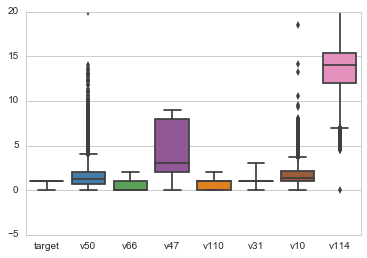

In [48]:
#A quick look a the data for outliers using a boxplot using seaborn
ax = sns.boxplot(data=cdata, orient="t", palette="Set1")

**Cross Validation -Train/test split method:** is by far the most optimal method for training and testing a classifier to unseen data the data into 70% training and the remainder for testing the model.

In [49]:
#Cross Validation -Train Test split method is by far the most optimal method for training and testing a classifier to unseen data the data into 70% training and the remainder for testing the model 
#using the subsetted data determined from the feature importance stage
X = cdata
Y = cdata.target.values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

### 2.2.1 - Scaling Data - Min Max Scaler
Subtracts the minimum of feature X from each value and divide by the range of X.or min - max scaling in sklearn data needs to be a numpy array.

In [51]:
#subtracts the minimum of feature X from each value and divide by the range of X.
from sklearn.preprocessing import MinMaxScaler
X= np.array(X)#for min - max scaling in sklearn data needs to be a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
rescaled_cdata = min_max_scaler.fit_transform(X)

In [52]:
rescaled_cdata

array([[ 1.        ,  0.04497105,  1.        , ...,  0.33333333,
         0.02715467,  0.78174538],
       [ 1.        ,  0.06896055,  0.        , ...,  0.33333333,
         0.07083828,  0.51540218],
       [ 1.        ,  0.03022525,  0.        , ...,  0.33333333,
         0.04132235,  0.56027808],
       ..., 
       [ 1.        ,  0.12053412,  0.        , ...,  0.66666667,
         0.11216063,  0.4446567 ],
       [ 1.        ,  0.04108287,  0.        , ...,  0.33333333,
         0.06965767,  0.61905567],
       [ 1.        ,  0.05003309,  1.        , ...,  0.33333333,
         0.0460449 ,  0.73176489]])

#### 2.2.2 - Cross - Validation on rescaled data for KNN

For this model we have we will used our sub sample date created during our feature importance stage of the analysis, the dataframe produced is "cdata". There is a fine balance between over-fitting and under-fitting the training data with this model which is sometimes reffered to as the "bias-variance trade-off". Assigning a large K will reduce this effect caused by noise.

In [53]:
#Cross - Validation 
from sklearn import cross_validation
x = rescaled_cdata
y = cdata.target.values
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)

### 2.2.3 - Estimating the number of Neighbours

In practice, choosing k depends on the difficulty of the concept to be learned and the number of records in the training data.
Typically, k is set somewhere between 3 and 10.
One common practice is to set k equal to the square root of the number of training examples.

In [54]:
#get length of training data to determine the number of neighbours to select for KNN Model
len(x_train)

80024

In [55]:
#standard use square root of training data length for n_neighbours = 240
import cmath
trainlen = 57160
train_sqrt = cmath.sqrt(trainlen)
print (train_sqrt)

(239.081576036+0j)


$$n = \sqrt{57160} = 239.08157$$

### 2.2.4 - Build the KNN Model

In [64]:
#Model 1 - Training K Nearest Neighbour Classification
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors= 239,weights='uniform')
y_pred2 = clf.fit(x_train, y_train).predict(x_test)
y_pred2

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

**Evaluating Model Performance - Classification Accuracy**

**Classification Report**

In [68]:
#Evaluating KNN model performance
creport2 = classification_report(y_test, y_pred2)
print (creport2)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8145
          1       1.00      1.00      1.00     26152

avg / total       1.00      1.00      1.00     34297



Data source: https://www.kaggle.com/c/bnp-paribas-cardif-claims-management